# Jupyter Notebook Tutorial 

Roughly, the design idea of ``mdciao`` is that:

* The [CLI](http://proteinformatics.uni-leipzig.de/mdciao/cli_cli/cli_cli.html) offers pre-packaged analysis pipelines that are essentially *one-shot* tools. They are an entry-point for non-experts and do not require any Python scripting knowledge. CLI tools are still highly customizable (check ``mdc_**.py -h`` or ``mdc_examples.py``), but offer **only some** of the ``mdciao``-functionalities.
  
* The [Python API](http://proteinformatics.uni-leipzig.de/mdciao/api/api.html), on the other hand, exposes:
   - **CLI-equivalent** functions via the ``mdciao.cli`` [submodule](http://proteinformatics.uni-leipzig.de/mdciao/cli_cli/cli_cli.html). Here you'll find evertying that the CLI offers, only as regular Python functions. This provides scripting flexibility, with the added value that now input and outputs are *normal* Python objects that can be further manipulated, by ``mdciao`` or any other Python module of your liking.
   - Other **standalone submodules** that the CLI uses *under the hood*, and that the user can access directly for any other scripting purpuse: plotting methods, alignment/sequence methods, nomenclature methods, PDB-methods etc.

<div class="alert alert-info">
    
<b>Note</b> 
    
**THE API IS NOT STABLE YET**, if you are using ``mdciao`` in API mode, we assume you can handle future API changes without much hassle.

</div>

For clarity, this notebook loosely follows the same structure as the [Overview](http://proteinformatics.uni-leipzig.de/mdciao/overview.html) section of the ``mdciao``documentation. Other notebooks will follow soon, explaining basic concepts and/or advanced pipelines.

If you want to run this notebook on your own, please download and extract the data from [here](http://proteinformatics.org/mdciao/mdciao_example.zip) first. You can download it:

* using the browser 
* using the terminal with  
 ```wget http://proteinformatics.org/mdciao/mdciao_example.zip; unzip mdciao_example.zip```
* using  mdciao's own method [mdciao.examples.fetch_example_data](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.examples.fetch_example_data.html#mdciao-examples-fetch-example-data)

In [1]:
import mdciao, os
if not os.path.exists("mdciao_example"):
    mdciao.examples.fetch_example_data()

Unzipping to 'mdciao_example'


## Basic Usage
Now we replicate the CLI command:

```
mdc_neighborhoods.py prot.pdb traj.xtc --residues L394 -nf #nf: don't use fragments
```

but in API mode. We use the method [cli.residue_neighborhoods](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.residue_neighborhoods.html#mdciao.cli.residue_neighborhoods):

Will compute contact frequencies for (1 items):
mdciao_example/traj.xtc
 with a stride of 1 frames
Using method 'None' these fragments were found
fragment      0 with   1044 AAs     LEU4 (     0) -   P0G395 (1043  ) (0)  resSeq jumps

Will compute neighborhoods for the residues
L394
excluding 4 nearest neighbors

   residue      residx    fragment      resSeq       GPCR        CGN
    LEU394         353           0        394       None       None

Pre-computing likely neighborhoods by reducing the neighbor-list
to those within 15 Angstrom in the first frame of reference geom
'mdciao_example/prot.pdb':...done!
From 1035 potential distances, the neighborhoods have been reduced to only 87 potential contacts.
If this number is still too high (i.e. the computation is too slow), consider using a smaller nlist_cutoff_Ang 
Streaming mdciao_example/traj.xtc (nr.   0) with stride  1 in chunks of  10000 frames. Now at chunk nr    0, frames so far    280
#idx   freq      contact       fragments  

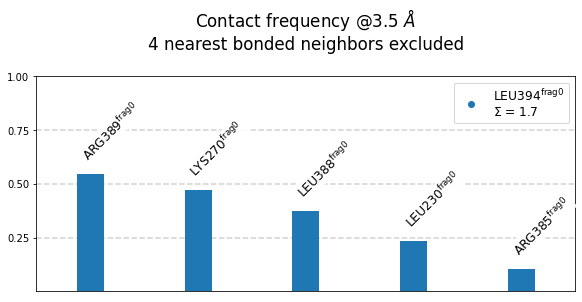

In [2]:
result= mdciao.cli.residue_neighborhoods("L394",
                                         "mdciao_example/traj.xtc", 
                                         "mdciao_example/prot.pdb", 
                                         fragments=[None])

``result`` is a dictionary of dictionaries, with the main result under the key ``neighborhoods``. There, you'll find a dictionary keyed with residue indices and valued with a [ContactGroup](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) for each residue neighborhood. 

[ContactGroups](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) are ``mdciao`` classes that allow the further manipulation of contact data, molecular information and much more. Check here to learn more about ``mdciao`` [classes](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.contacts.html).

In [3]:
result["neighborhoods"][353]

## Using Python Objects
Please note that in API mode, inputs can be objects, for example ``mdtraj`` [Trajectories](https://mdtraj.org/1.9.4/api/generated/mdtraj.Trajectory.html). So, before calling the next ``mdciao.cli`` method, we use ``mdtraj`` to load the trajectory from our files:

In [4]:
import mdtraj as md
traj = md.load("mdciao_example/traj.xtc", top="mdciao_example/prot.pdb")
traj

<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells at 0x7fb7c1608510>

And we repeat the above command using the ``traj`` object. Please note that we're also using the ``no_disk`` option so that no files are written to disk, in case we're only interested in working in memory.

Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'None' these fragments were found
fragment      0 with   1044 AAs     LEU4 (     0) -   P0G395 (1043  ) (0)  resSeq jumps

Will compute neighborhoods for the residues
L394
excluding 4 nearest neighbors

   residue      residx    fragment      resSeq       GPCR        CGN
    LEU394         353           0        394       None       None

Pre-computing likely neighborhoods by reducing the neighbor-list
to those within 15 Angstrom in the first frame of reference geom
'<mdtraj.Trajectory with 1 frames, 8384 atoms, 1044 residues, and unitcells>':...done!
From 1035 potential distances, the neighborhoods have been reduced to only 74 potential contacts.
If this number is still too high (i.e. the computation is too slow), consider using a smaller nlist_cutoff_Ang 
Streaming over trajectory object nr.   0 (   280 frames,    280 wi

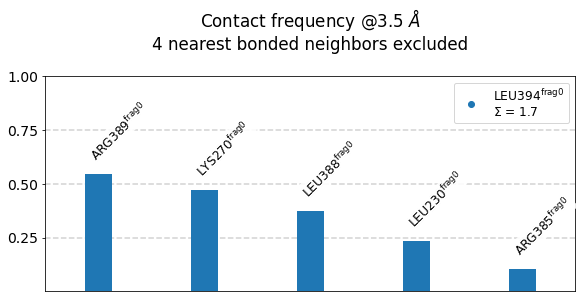

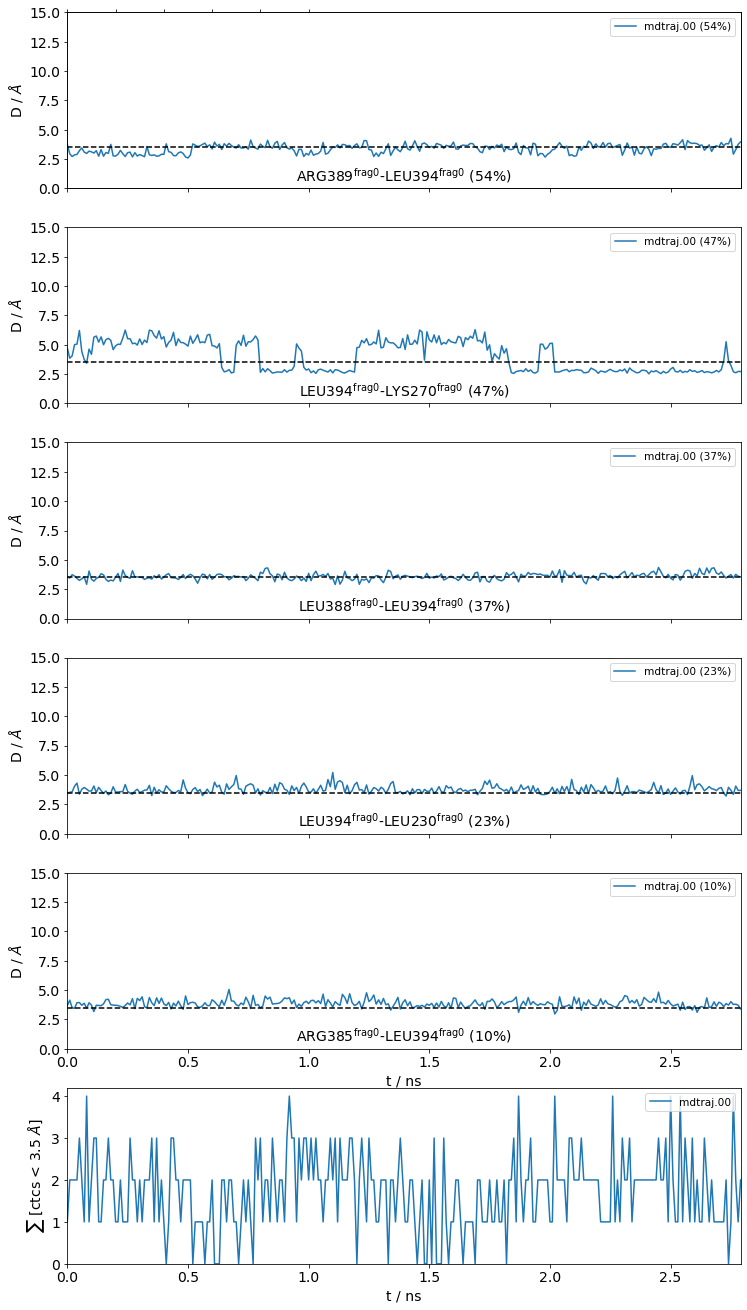

In [5]:
result = mdciao.cli.residue_neighborhoods("L394",
                                          traj,
                                          fragments=[None],
                                          no_disk=True)

Now, the more elaborated CLI-command:

```
mdc_neighborhoods.py prot.pdb traj.xtc -r L394 --GPCR adrb2_human --CGN 3SN6 -ni -at #ni: not interactive, at: show atom-types
```

We keep the ``no_disk`` option to avoid writing to disk, but you can change this if you want. **Please note** that some options **do not carry** exactly the same names as their CLI equivalents. E.g. ``ni`` in the CLI (= *don't be interactive*) is now ``accept_guess`` in the API. These differences are needed for compatiblity with other methods, but might get unified in the future. 

Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment      0 with    354 AAs     LEU4 (     0) -   LEU394 (353   ) (0)  resSeq jumps
fragment      1 with    340 AAs     GLN1 (   354) -   ASN340 (693   ) (1) 
fragment      2 with     66 AAs     ALA2 (   694) -    PHE67 (759   ) (2) 
fragment      3 with    283 AAs    GLU30 (   760) -   LEU340 (1042  ) (3)  resSeq jumps
fragment      4 with      1 AAs   P0G395 (  1043) -   P0G395 (1043  ) (4) 
No local file ./adrb2_human.xlsx found, checking online in
https://gpcrdb.org/services/residues/extended/adrb2_human ...done!
Please cite the following reference to the GPCRdb:
 * Kooistra et al, (2021) GPCRdb in 2021: Integrating GPCR sequence, structure and function
   Nucleic Acids Research 49, D335--D343
   https://doi.org/10.1093/nar/gkaa1080
For more information, use the mdciao.nomen

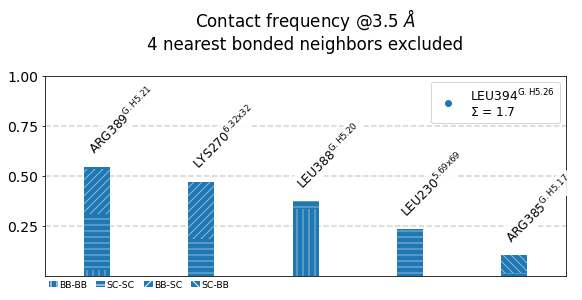

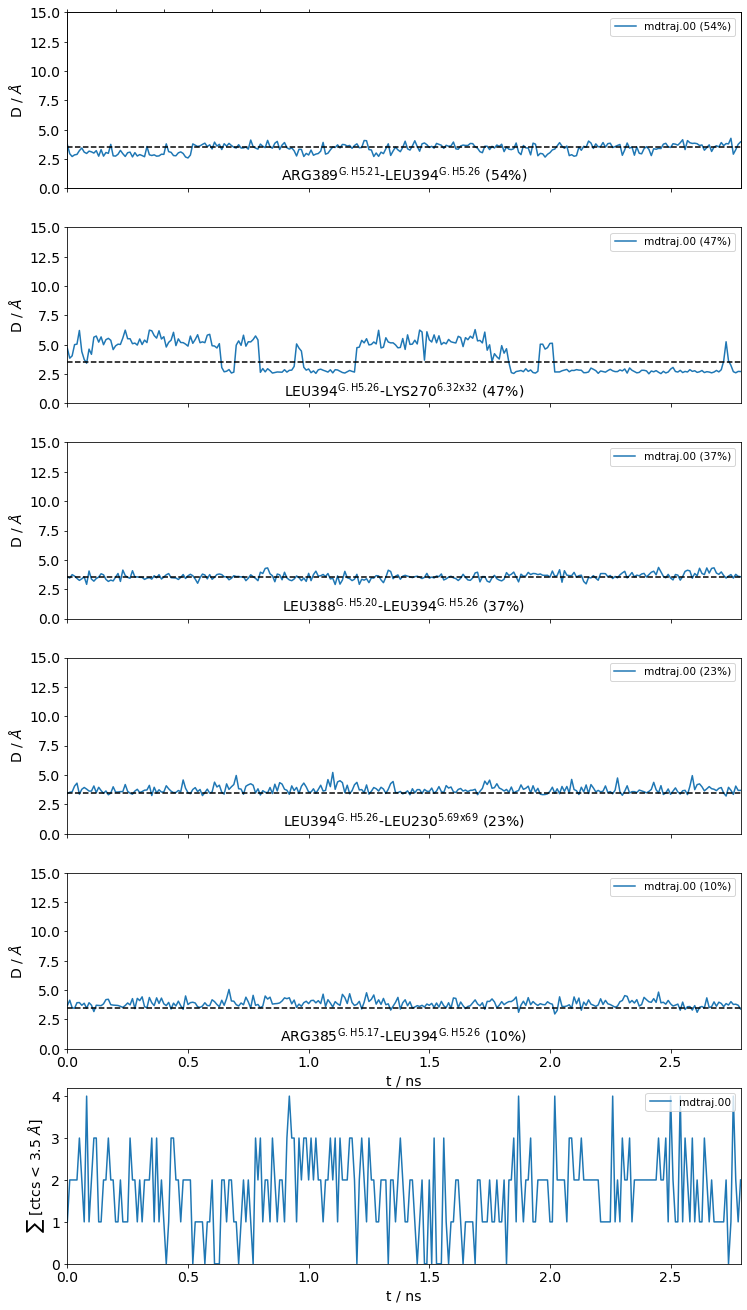

In [6]:
result = mdciao.cli.residue_neighborhoods("L394",
                                          traj,
                                          GPCR_uniprot="adrb2_human",
                                          CGN_PDB="3SN6",
                                          accept_guess=True,
                                          plot_atomtypes=True,
                                          no_disk=True)

## Consensus Nomenclature: GPCR and/or CGN
Above, we declared our intention to use GPCR consensus nomenclature and Common G-alpha Numbering (CGN) by passing the descriptor strings ``GPCR_uniprot="adrb2_human"`` or ``CGN_PDB="3SN6"``, respectively, to contact the online databases.

For that retrieval and handling of these labels, we use the [module](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html) ``mdciao.nomenclature``, which offers [two main classes](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html#classes) and other helper function to deal with the nomenclature. An overview of the relevant references is contained in [the module's documentation](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html) as well as in the documentation of each class, e.g. [here](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.nomenclature.LabelerGPCR.html#mdciao.nomenclature.LabelerGPCR).

Additionally, you can use [mdciao.nomenclature.references](mdciao.nomenclature.references.html#mdciao-nomenclature-references) to print all relevant nomenclature references:

In [7]:
mdciao.nomenclature.references()

mdciao.nomenclature functions thanks to these online databases. Please cite them if you use this module:
 * Kooistra et al, (2021) GPCRdb in 2021: Integrating GPCR sequence, structure and function
   Nucleic Acids Research 49, D335--D343
   https://doi.org/10.1093/nar/gkaa1080
 * Berman et al, (2000) The Protein Data Bank
   Nucleic Acids Research 28, 235--242
   https://doi.org/10.1093/NAR/28.1.235
 * Flock et al, (2015) Universal allosteric mechanism for G$\alpha$ activation by GPCRs
   Nature 2015 524:7564 524, 173--179
   https://doi.org/10.1038/nature14663

Additionally, depending on the chosen nomenclature type, you should cite:
 * Structure based GPCR notation
   - Isberg et al, (2015) Generic GPCR residue numbers - Aligning topology maps while minding the gaps
     Trends in Pharmacological Sciences 36, 22--31
     https://doi.org/10.1016/j.tips.2014.11.001
   - Isberg et al, (2015) Generic GPCR residue numbers - Aligning topology maps while minding the gaps
     Trends in Phar

The nomenclature classes produce standalone objects, and can do much more than just be inputs to `mdciao.cli` methods. As with any Python class, you can learn a lot about its methods and attributes by using the [tab autocompletion feature of IPython](https://ipython.org/ipython-doc/dev/interactive/tutorial.html#tab-completion). Or you can check [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html) for more ``mdciao`` docs. 

Since we'll be using these labels more than once in the notebook, instead of using the network each time, we can have them as Python objects in memory. Alternatively, it's possible to save the labeling data locally after the first database query. This allows for inspection and re-use of the retrieved data outside the notebook (in a spreadsheet, for example).

In [8]:
from mdciao import nomenclature
GPCR = nomenclature.LabelerGPCR("adrb2_human", 
                            #write_to_disk=True 
                           )
CGN = nomenclature.LabelerCGN("3SN6", 
                             # write_to_disk=True
                             )

No local file ./adrb2_human.xlsx found, checking online in
https://gpcrdb.org/services/residues/extended/adrb2_human ...done!
Please cite the following reference to the GPCRdb:
 * Kooistra et al, (2021) GPCRdb in 2021: Integrating GPCR sequence, structure and function
   Nucleic Acids Research 49, D335--D343
   https://doi.org/10.1093/nar/gkaa1080
For more information, use the mdciao.nomenclature.Literature class
done without 404, continuing.
Using CGN-nomenclature, please cite
 * Flock et al, (2015) Universal allosteric mechanism for G$\alpha$ activation by GPCRs
   Nature 2015 524:7564 524, 173--179
   https://doi.org/10.1038/nature14663
No local file ./CGN_3SN6.txt found, checking online in
https://www.mrc-lmb.cam.ac.uk/CGN/lookup_results/3SN6.txt ...done without 404, continuing.


## Residue Selection
Now, we can play around with residue selection, replicating the CLI-command:

```
mdc_residues.py GLU*,P0G,380-394,G.HN.* prot.pdb --GPCR adrb2_human --CGN 3SN6 -ni
```

Check the docs [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.residue_selection.html) to check the output values `res_idxs_list`,` fragments`, and `consensus_maps`, although most of out useful output is written out.

Please note that we're now using ``mdciao.nomenclature`` classes directly as inputs (``GPCR`` and ``CGN``), speeding up the method by avoiding queries over the network.

In [9]:
res_idxs_list, fragments, consensus_maps = mdciao.cli.residue_selection(
    "GLU*,P0G,380-394,G.HN.*",
    traj,
    GPCR_uniprot=GPCR,
    CGN_PDB=CGN,
    accept_guess=True)

Using method 'lig_resSeq+' these fragments were found
fragment      0 with    354 AAs     LEU4 (     0) -   LEU394 (353   ) (0)  resSeq jumps
fragment      1 with    340 AAs     GLN1 (   354) -   ASN340 (693   ) (1) 
fragment      2 with     66 AAs     ALA2 (   694) -    PHE67 (759   ) (2) 
fragment      3 with    283 AAs    GLU30 (   760) -   LEU340 (1042  ) (3)  resSeq jumps
fragment      4 with      1 AAs   P0G395 (  1043) -   P0G395 (1043  ) (4) 
GPCR-labels align best with fragments: [3] (first-last: GLU30-LEU340).

These are the GPCR fragments mapped onto your topology:
    TM1 with     32 AAs    GLU30@1.29x29   (   760) -    PHE61@1.60x60   (791   ) (TM1) 
   ICL1 with      4 AAs    GLU62@12.48x48  (   792) -    GLN65@12.51x51  (795   ) (ICL1) 
    TM2 with     32 AAs    THR66@2.37x37   (   796) -    LYS97@2.68x67   (827   ) (TM2) 
   ECL1 with      4 AAs    MET98@23.49x49  (   828) -   PHE101@23.52x52  (831   ) (ECL1) 
    TM3 with     36 AAs   GLY102@3.21x21   (   832) -   SER

## PDB Queries
Now we grab a structure directly from the PDB, replicating the CLI command:

```
mdc_pdb.py 3SN6 -o 3SN6.gro
```

by using `mdciao.cli.pdb`. Check [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.pdb.html#mdciao.cli.pdb) or use the inline docstring for more info. Please note that we're not storing the retrived structure on disk, but rather having it in memory as an ``mdtraj.Trajectory``:

In [10]:
xray3SN6= mdciao.cli.pdb("3SN6")
xray3SN6

Checking https://files.rcsb.org/download/3SN6.pdb ...done
Please cite the following 3rd party publication:
 * Crystal structure of the beta2 adrenergic receptor-Gs protein complex
   Rasmussen, S.G. et al., Nature 2011
   https://doi.org/10.1038/nature10361


<mdtraj.Trajectory with 1 frames, 10270 atoms, 1319 residues, and unitcells at 0x7fb7b44a3d10>

Now we can use the [awesome nglviewer](https://github.com/nglviewer/nglview/) to 3D-visualize the freshly grabbed structure inside the notebook.

We need to import the module first, which needs to be installed in your Python environment. If you don't we recommend you [install](https://github.com/nglviewer/nglview/#installation) it via pip:

```
pip install nglview
jupyter-nbextension enable nglview --py --sys-prefix
```

If you don't feel like installing now, you can continue use the notebook. 

In [11]:
try:
    import nglview
    iwd = nglview.show_mdtraj(xray3SN6)
except ImportError:
    iwd = None
iwd


NGLWidget()

## Fragmentation Heuristics
Now we go to fragmentation heuristics, replicating the CLI command:

```
mdc_fragments.py 3SN6.gro
```

but with the object ``xray3SN6`` (the ``.gro``-file comes below) and by using the ``cli.fragments`` method. Check [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.fragment_overview.html#mdciao.cli.fragment_overview) or the inline docstring for more info. Also note that ``cli.fragments`` simply wraps around [mdciao.fragments.get_fragments](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.fragments.get_fragments.html), and you can use that method (or others in [mdciao.fragments](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.fragments.html)) directly.

In [12]:
frags= mdciao.cli.fragment_overview(xray3SN6.top)

Auto-detected fragments with method 'chains'
fragment      0 with    349 AAs     THR9 (     0) -   LEU394 (348   ) (0)  resSeq jumps
fragment      1 with    340 AAs     GLN1 (   349) -   ASN340 (688   ) (1) 
fragment      2 with     58 AAs     ASN5 (   689) -    ARG62 (746   ) (2) 
fragment      3 with    443 AAs  ASN1002 (   747) -   CYS341 (1189  ) (3)  resSeq jumps
fragment      4 with    128 AAs     GLN1 (  1190) -   SER128 (1317  ) (4) 
fragment      5 with      1 AAs  P0G1601 (  1318) -  P0G1601 (1318  ) (5) 

Auto-detected fragments with method 'resSeq'
fragment      0 with     51 AAs     THR9 (     0) -    GLN59 (50    ) (0) 
fragment      1 with    115 AAs    LYS88 (    51) -   VAL202 (165   ) (1) 
fragment      2 with     51 AAs   SER205 (   166) -   MET255 (216   ) (2) 
fragment      3 with    132 AAs   THR263 (   217) -   LEU394 (348   ) (3) 
fragment      4 with    340 AAs     GLN1 (   349) -   ASN340 (688   ) (4) 
fragment      5 with     58 AAs     ASN5 (   689) -    ARG

This call iterates through all available heuristics on the ``mdtraj``[Topology](https://mdtraj.org/1.9.4/api/generated/mdtraj.Topology.html), arriving at different definitions of molecular fragments. They are all returned as a dictionary:

In [13]:
frags.keys()

dict_keys(['chains', 'resSeq', 'resSeq+', 'lig_resSeq+', 'bonds', 'resSeq_bonds', 'None'])

Please note that since ``xray3SN6`` comes from the PDB directly, it contains chain descriptors, s.t. the method ``chains`` (first one) can simply list the chain information encoded into the PDB, which you can check [here](https://www.rcsb.org/sequence/3SN6):

```
Auto-detected fragments with method 'chains'
fragment      0 with    349 AAs     THR9 (     0) -   LEU394 (348   ) (0)  resSeq jumps
fragment      1 with    340 AAs     GLN1 (   349) -   ASN340 (688   ) (1) 
fragment      2 with     58 AAs     ASN5 (   689) -    ARG62 (746   ) (2) 
fragment      3 with    443 AAs  ASN1002 (   747) -   CYS341 (1189  ) (3)  resSeq jumps
fragment      4 with    128 AAs     GLN1 (  1190) -   SER128 (1317  ) (4) 
fragment      5 with      1 AAs  P0G1601 (  1318) -  P0G1601 (1318  ) (5)       5 with    1 AAs  P0G1601           (1318) -  P0G1601           (1318) (5) 
```

These fragments are:

0. G-protein $\alpha$ sub-unit
1. G-protein $\beta$ sub-unit
2. G-protein $\gamma$ sub-unit
3. $\beta_2$ adrenergic receptor, together with the bacteriophage T4 lysozyme as N-terminus
4. VHH nanobody
5. Ligand P0G

However, we loose that chain information if we store the structure as ``.gro``, which doesn't encode for chains (i.e., the entire topology is put into a single chain).

In [14]:
from tempfile import NamedTemporaryFile
with NamedTemporaryFile(suffix=".gro") as tmpgro:
    xray3SN6.save(tmpgro.name)
    xray3SN6gro = md.load(tmpgro.name)
mdciao.cli.fragment_overview(xray3SN6gro.top, methods=["chains", "lig_resSeq+"]);

Auto-detected fragments with method 'chains'
fragment      0 with   1319 AAs     THR9 (     0) -  P0G1601 (1318  ) (0)  resSeq jumps

Auto-detected fragments with method 'lig_resSeq+'
fragment      0 with    349 AAs     THR9 (     0) -   LEU394 (348   ) (0)  resSeq jumps
fragment      1 with    340 AAs     GLN1 (   349) -   ASN340 (688   ) (1) 
fragment      2 with     58 AAs     ASN5 (   689) -    ARG62 (746   ) (2) 
fragment      3 with    159 AAs  ASN1002 (   747) -  ALA1160 (905   ) (3) 
fragment      4 with    284 AAs    GLU30 (   906) -   CYS341 (1189  ) (4)  resSeq jumps
fragment      5 with    128 AAs     GLN1 (  1190) -   SER128 (1317  ) (5) 
fragment      6 with      1 AAs  P0G1601 (  1318) -  P0G1601 (1318  ) (6) 



The ``lig_resSeq+`` (the current default) has attempted to recover some meaningful fragments, closely resembling the original chains:

0. G-protein $\alpha$ sub-unit
1. G-protein $\beta$ sub-unit
2. G-protein $\gamma$ sub-unit
3. Bacteriophage T4 lysozyme as N-terminus
4. $\beta_2$ adrenergic receptor
5. VHH nanobody
6. Ligand P0G

The former fragment 3 (4TL-$\beta_2$AR) chain has been broken up into T4L and $\beta_2$AR.

## Interfaces
Now we move to a more elaborate command:

```
mdc_interface.py prot.pdb traj.xtc -fg1 0 -fg2 3 --GPCR adrb2_human --CGN 3SN6 -t "3SN6 beta2AR-Galpha interface" -ni
```

and replicate it using ``cli.interface``. Check the docs [here](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.interface.html#mdciao.cli.interface) or in the method's docstring. 

Additionally, we now have two other notebooks explicitly devoted to the representation of interfaces:

* [Bar Plots](https://proteinformatics.uni-leipzig.de/mdciao/notebooks/Comparing_CGs_Bars.html)
* [FlarePlots](https://proteinformatics.uni-leipzig.de/mdciao/notebooks/Comparing_CGs_Flares.html)

Will compute contact frequencies for trajectories:
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment      0 with    354 AAs     LEU4 (     0) -   LEU394 (353   ) (0)  resSeq jumps
fragment      1 with    340 AAs     GLN1 (   354) -   ASN340 (693   ) (1) 
fragment      2 with     66 AAs     ALA2 (   694) -    PHE67 (759   ) (2) 
fragment      3 with    283 AAs    GLU30 (   760) -   LEU340 (1042  ) (3)  resSeq jumps
fragment      4 with      1 AAs   P0G395 (  1043) -   P0G395 (1043  ) (4) 
GPCR-labels align best with fragments: [3] (first-last: GLU30-LEU340).

These are the GPCR fragments mapped onto your topology:
    TM1 with     32 AAs    GLU30@1.29x29   (   760) -    PHE61@1.60x60   (791   ) (TM1) 
   ICL1 with      4 AAs    GLU62@12.48x48  (   792) -    GLN65@12.51x51  (795   ) (ICL1) 
    TM2 with     32 AAs    THR66@2.37x37   (   796) -    LYS97@2.68x67   (827   ) 

  0%|          | 0/1 [00:00<?, ?it/s]

done!

From 100182 potential group_1-group_2 distances, the interface was reduced to only 20307 potential contacts.
If this number is still too high (i.e. the computation is too slow) consider using a smaller interface cutoff



100%|██████████| 1/1 [00:16<00:00, 16.49s/it]


These 20 contacts capture 12.03 (~78%) of the total frequency 15.52 (over 20307 input contacts)
As orientation value, the first 31 ctcs already capture 90.0% of 15.52.
The 31-th contact has a frequency of 0.14


    freq                            label residue idxs    sum
0   1.00   D381@G.H5.13    - Q229@5.68x68      340 956   1.00
1   1.00   R385@G.H5.17    - Q229@5.68x68      344 956   2.00
2   1.00   D381@G.H5.13    - K232@5.71x71      340 959   3.00
3   0.98   Q384@G.H5.16    - I135@3.54x54      343 865   3.98
4   0.96      T350@G.h4s6.3   - R239@ICL3      309 966   4.93
5   0.85   E392@G.H5.24    - T274@6.36x36      351 976   5.79
6   0.68   Q384@G.H5.16    - Q229@5.68x68      343 956   6.46
7   0.64   H387@G.H5.19    - A134@3.53x53      346 864   7.10
8   0.57   Y391@G.H5.23    - T274@6.36x36      350 976   7.67
9   0.55   Y358@G.h4s6.20  - E237@5.76x76      317 964   8.22
10  0.49   R385@G.H5.17    - K232@5.71x71      344 959   8.71
11  0.47   L394@G.H5.26    - K270@6.32x32   

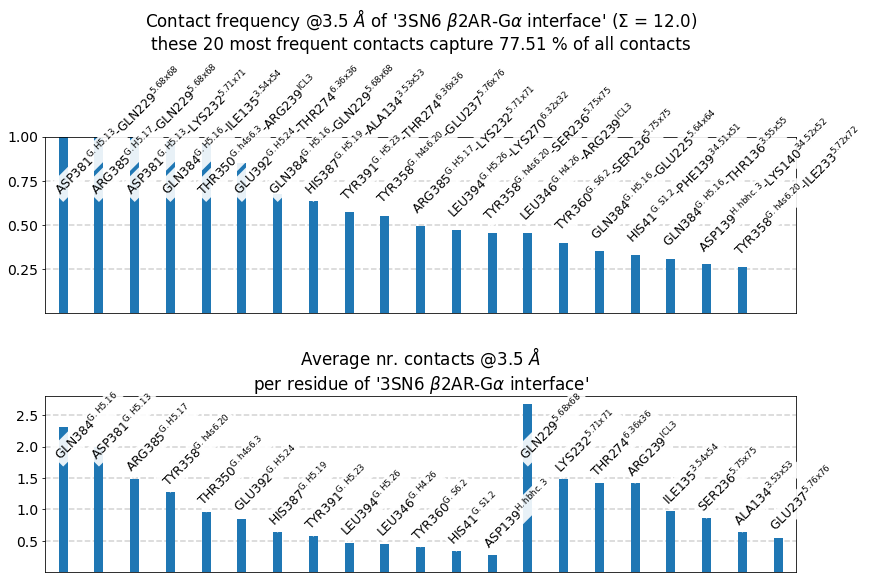

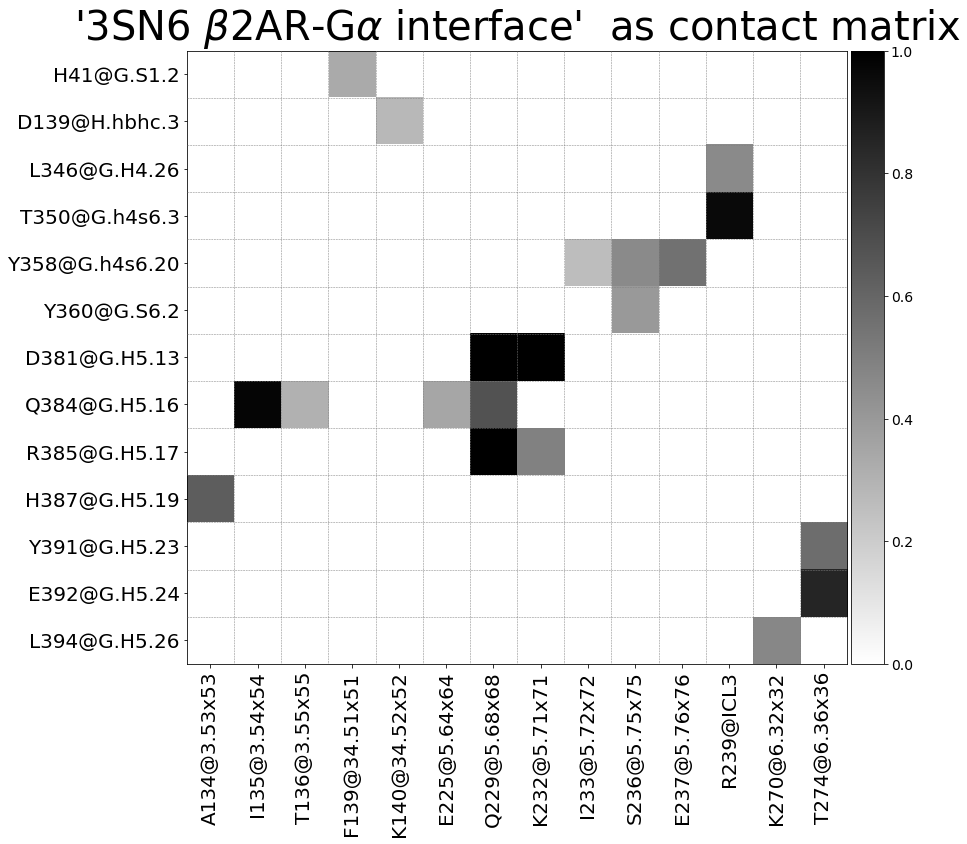

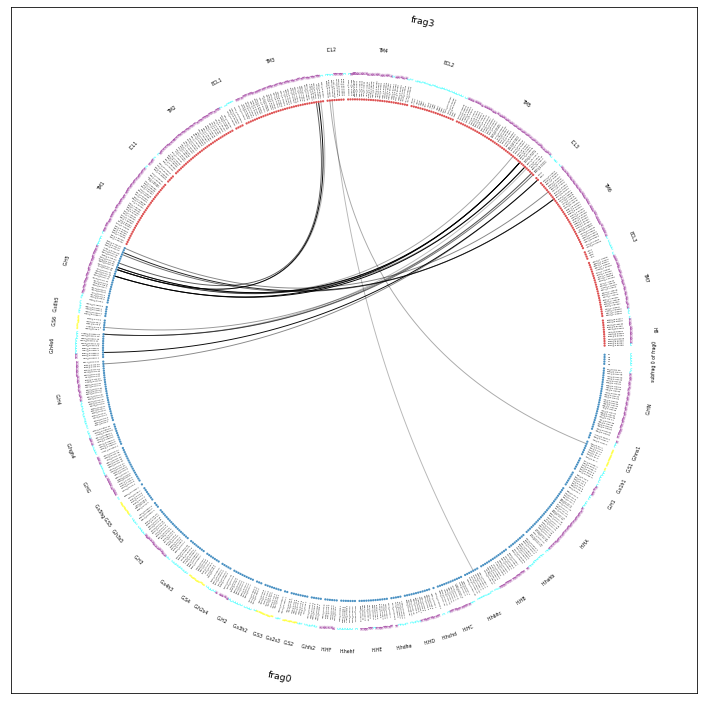

In [15]:
mdciao.cli.interface(traj,
                     frag_idxs_group_1=[0],
                     frag_idxs_group_2=[3],
                     GPCR_uniprot=GPCR,
                     CGN_PDB=CGN,
                     title="3SN6 beta2AR-Galpha interface",
                     accept_guess=True,
                     plot_timedep=False,
                     no_disk=True)

## Sites
Now we use a different approach. Instead of letting ``mdciao`` discover contacts automatically, we list them beforehand as ``site`` dictionaries, and feed this dictionaries to directly to the [method](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.sites.html) ``cli.sites``. The CLI command we're replicating is:

```
mdc_sites.py prot.pdb traj.xtc --site tip.json -at -nf -sa #sa: short AA-names
```

However, in the API-spirit, we're not even using a file on disk to define the ``site``, but create it on the fly as a Python dictionary:

In [16]:
my_site = {
    "name":"interface small",
    "pairs": {"AAresSeq": [
        "L394-K270",
        "D381-Q229",
        "Q384-Q229",
        "R385-Q229",
        "D381-K232",
        "Q384-I135"
        ]}}

Will compute the sites
 site dict with name interface small
in the trajectories:
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames.

Using method 'None' these fragments were found
fragment      0 with   1044 AAs     LEU4 (     0) -   P0G395 (1043  ) (0)  resSeq jumps
   residue      residx    fragment      resSeq         BW        CGN
    ASP381         340           0        340       None       None
    GLN384         343           0        343       None       None
    ARG385         344           0        344       None       None
    LEU394         353           0        353       None       None
    ILE135         865           0        865       None       None
    GLN229         956           0        956       None       None
    LYS232         959           0        959       None       None
    LYS270         972           0        972       None       None
Streaming over trajectory object nr.   0 (   280 frames,    280 

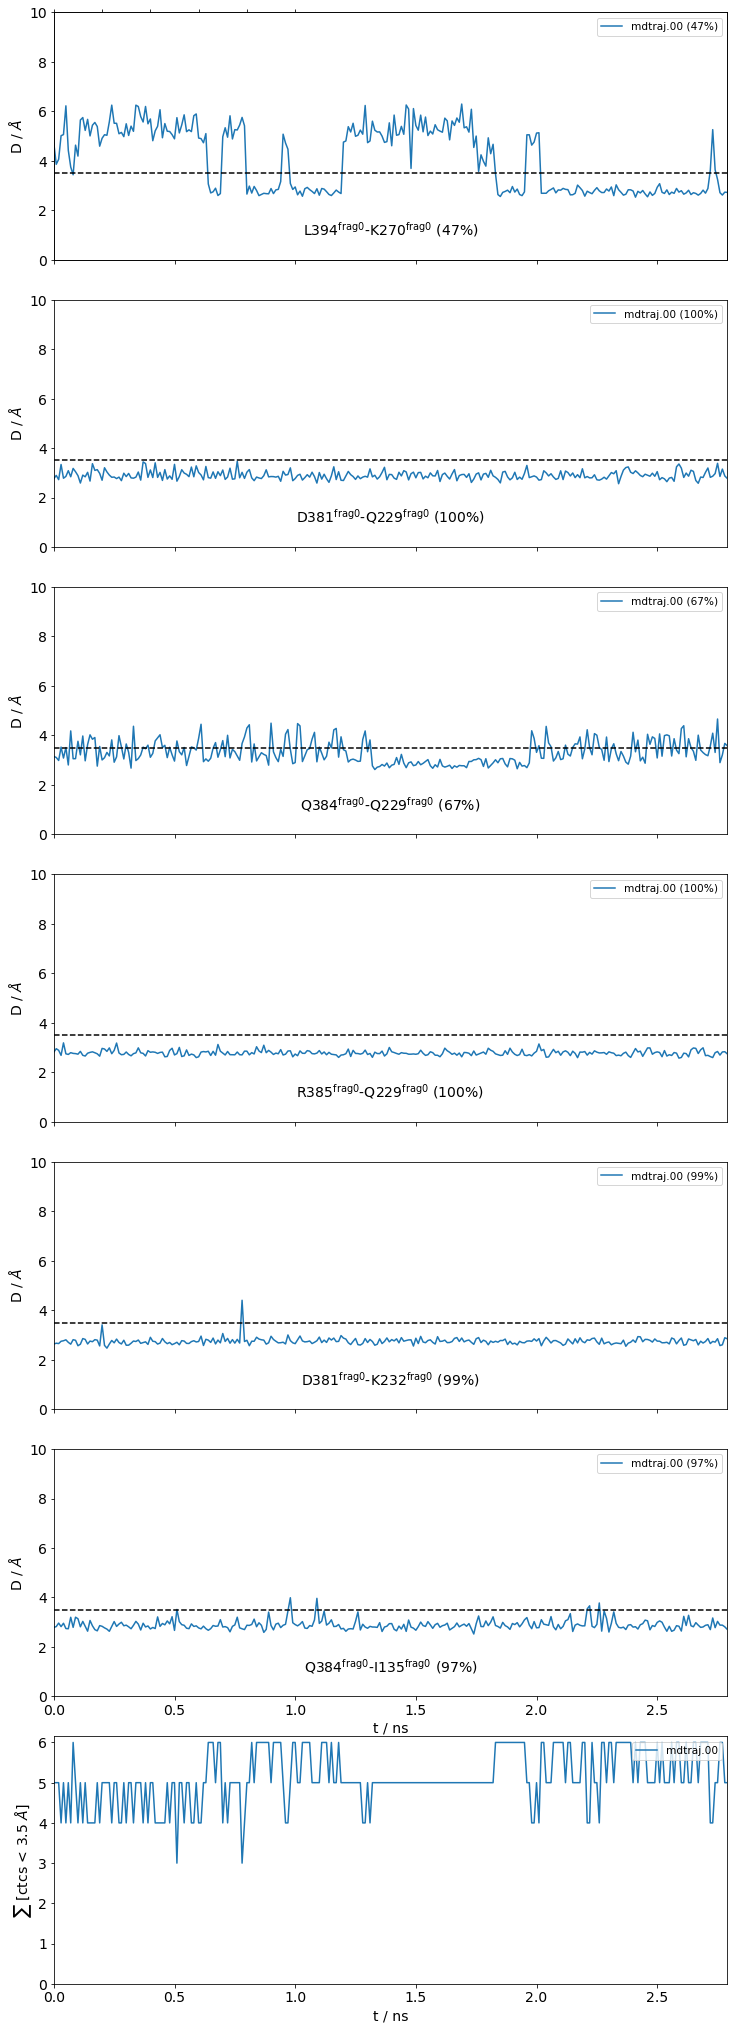

In [17]:
sites = mdciao.cli.sites([my_site],
                         traj,
                         no_disk=True,
                         plot_atomtypes=True,
                         fragments=[None],
                         short_AA_names=True)

The return value ``sites`` is a dictionary keyed with the site names (``interface small`` in this case) and valued with ``mdciao's`` [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup)-objects.

In [18]:
sites

{'interface small': <mdciao.contacts.contacts.ContactGroup at 0x7fb7c06312d0>}

## Contact Groups
The [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) class is at the center of ``mdciao`` and offers extensive of manipulation through it's methods. A helpful analogy would be that, what the [Trajectory](https://mdtraj.org/1.9.4/api/generated/mdtraj.Trajectory.html) is to ``mdtraj``, the [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) is to ``mdciao``. Both classes:
 
 * store a lot of organized information for further use
 * have attributes and methods that can be used standalone
 * can themselves be the input for other methods (of ``mdtraj`` and ``mdciao``, respectively). 
 * are rarely created from scratch, but rather generated by the module itself.

The best way to learn about the [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) is to inspect it with the autocomplete feature if IPython and check the informative names of the attributes and methods.

If you're in a hurry, ``mdciao`` offers a quick way to generate a [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) to play around with and investigate it's methods and attributes:

In [19]:
from mdciao import examples
CG = examples.ContactGroupL394()
CG

However, instead of using ``CG`` now, we go back to object ``sites`` that resulted from using ``cli.sites`` above. The returned ``sites``-object is a dictionary keyed with site names (you can compute different sites simultaneously) and valued with [ContactGroups](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup). In our case (check above) we called it it *interface small*

In [20]:
mysite = sites["interface small"]

### Frequencies as Bars
We use the class's method [plot_freqs_as_bars](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_bars) to produce the now familiar neighborhood plots:

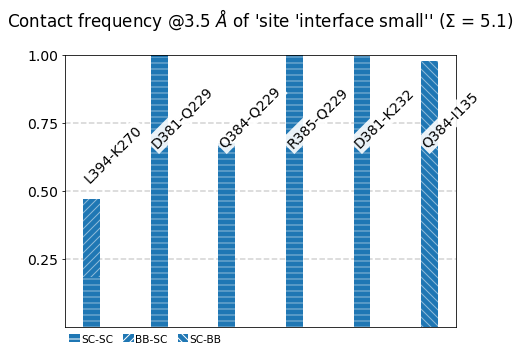

In [21]:
mysite.plot_freqs_as_bars(3.5, 
                          shorten_AAs=True, 
                          defrag="@", 
                          atom_types=True);

### Frequencies as Distributions
It is also very useful to inspect the residue-residue distances of any [ContactGroup](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup) by looking at their **overall distributions** instead of their frequencies, since the hard cutoffs can sometimes hide part of the story:

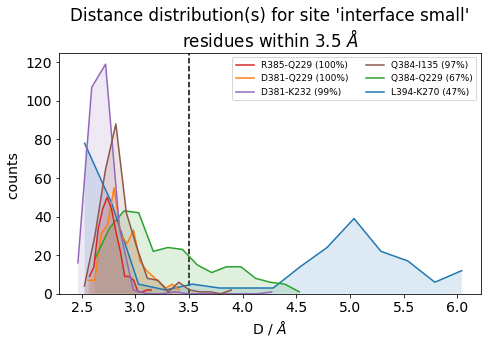

In [22]:
jax = mysite.plot_distance_distributions(bins=15,
                                         defrag="@",
                                         ctc_cutoff_Ang=3.5
                                        )

Please note that, because the example dataset is quite small (280 frames and 2.8 ns) and we are simply histogramming (=counting), the curves aren't very smooth. Histograms of real data will look better.

### Frequencies as Violins
Other ways of looking at distance-data as distributions is to use [violin plots](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_violins), which uses a density estimator (check the ``bw_method``-parameter [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html))  to generate smooth densities and plot them vertically. This is somehow in-between the histogram plot and the frequency-bar plot:

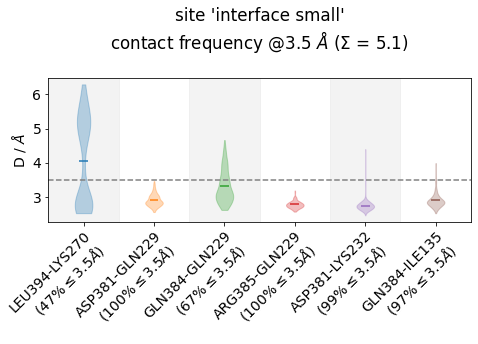

In [23]:
jax = mysite.plot_violins(defrag="@",
                          ctc_cutoff_Ang=3.5,
                          color="tab10", 
                         )

<div class="alert alert-info">
    
<b>Note</b> 
    
In principle,  we could also use a density estimator in ``plot_distance_distributions``to make them look smooth, but we have decided to leave them as.
</div>

## Comparisons Between Contact Groups
Finally, we replicate the CLI comand

```
mdc_compare.py 3SN6.X.ARG131@4.0_Ang.dat 3SN6.MD.ARG131@4.0_Ang.dat -k Xray,MD -t "3SN6 cutoff 4AA" -a R131
```

in API mode. This looks different because most of the inputs will now be Python objects in memory.

First, we create the Xray and the MD ContactGroups separately:

In [24]:
R131_Xray = mdciao.cli.residue_neighborhoods("R131", xray3SN6, 
                                             ctc_cutoff_Ang=4,
                                             no_disk=True,
                                             GPCR_uniprot=GPCR,
                                             figures=False,
                                             CGN_PDB=CGN,
                                             accept_guess=True)["neighborhoods"];

Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 1 frames, 10270 atoms, 1319 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment      0 with    349 AAs     THR9 (     0) -   LEU394 (348   ) (0)  resSeq jumps
fragment      1 with    340 AAs     GLN1 (   349) -   ASN340 (688   ) (1) 
fragment      2 with     58 AAs     ASN5 (   689) -    ARG62 (746   ) (2) 
fragment      3 with    159 AAs  ASN1002 (   747) -  ALA1160 (905   ) (3) 
fragment      4 with    284 AAs    GLU30 (   906) -   CYS341 (1189  ) (4)  resSeq jumps
fragment      5 with    128 AAs     GLN1 (  1190) -   SER128 (1317  ) (5) 
fragment      6 with      1 AAs  P0G1601 (  1318) -  P0G1601 (1318  ) (6) 
GPCR-labels align best with fragments: [4] (first-last: GLU30-CYS341).

These are the GPCR fragments mapped onto your topology:
    TM1 with     32 AAs    GLU30@1.29x29   (   906) -    PHE61@1.60x60   (937   ) (TM1) 
   ICL1 with      4 AAs   

In [25]:
R131_MD = mdciao.cli.residue_neighborhoods("R131",traj, 
                                           ctc_cutoff_Ang=4,
                                           no_disk=True,
                                           GPCR_uniprot=GPCR,
                                           figures=False,
                                           CGN_PDB=CGN,
                                           accept_guess=True)["neighborhoods"];

Will compute contact frequencies for (1 items):
<mdtraj.Trajectory with 280 frames, 8384 atoms, 1044 residues, and unitcells>
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment      0 with    354 AAs     LEU4 (     0) -   LEU394 (353   ) (0)  resSeq jumps
fragment      1 with    340 AAs     GLN1 (   354) -   ASN340 (693   ) (1) 
fragment      2 with     66 AAs     ALA2 (   694) -    PHE67 (759   ) (2) 
fragment      3 with    283 AAs    GLU30 (   760) -   LEU340 (1042  ) (3)  resSeq jumps
fragment      4 with      1 AAs   P0G395 (  1043) -   P0G395 (1043  ) (4) 
GPCR-labels align best with fragments: [3] (first-last: GLU30-LEU340).

These are the GPCR fragments mapped onto your topology:
    TM1 with     32 AAs    GLU30@1.29x29   (   760) -    PHE61@1.60x60   (791   ) (TM1) 
   ICL1 with      4 AAs    GLU62@12.48x48  (   792) -    GLN65@12.51x51  (795   ) (ICL1) 
    TM2 with     32 AAs    THR66@2.37x37   (   796) -    LYS97@2.68x67   (827   ) (TM

Please note that, because the molecular topologies differ, the residue ``R131`` is has different indices in each topology, namely 1007 in the X-ray crystal, 861 in the MD simulation:

In [26]:
R131_Xray, R131_MD

({1007: <mdciao.contacts.contacts.ContactGroup at 0x7fb7a9abf950>},
 {861: <mdciao.contacts.contacts.ContactGroup at 0x7fb7aafad550>})

That will frequently be the case when comparing different proteins of the same family, or topologies where not all sub-units have been modelled etc or antying that produces a shift in these indices. 

``mdciao`` *understands* ``R131`` automatically and doesn't ask more questions, as long as there's an obvious ``R131`` candidate. Otherwise the user will be prompted for disambiguation. 

In this case, now we create a dictionary of ContactGroups that represent the R131 in both topologies:

In [27]:
R131 = {
    "Xray": R131_Xray[1007],
    "MD"  : R131_MD[861]
}
#np.save("R131.npz",R131)

Now we can just pass this dictionary to ``cli.compare`` to see their contact frequencies. This module is pretty flexible on inputs and outputs, check the [documentation](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.compare.html#mdciao.cli.compare) to learn more: 

These interactions are not shared:
Y219@5.58x58
Their cumulative ctc freq is 0.44. 
Created files
freq_comparison.pdf
freq_comparison.xlsx


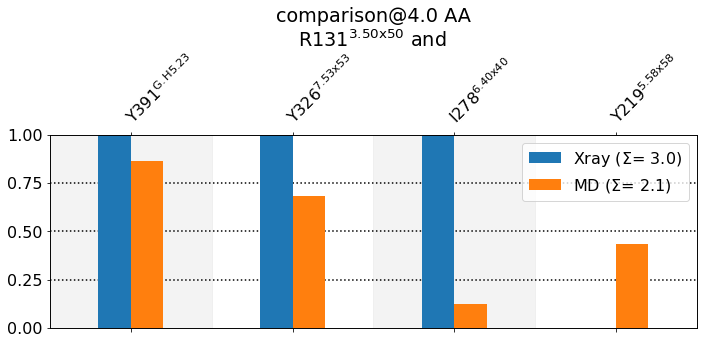

In [28]:
mdciao.cli.compare(R131, ctc_cutoff_Ang=4, defrag=None, anchor="R131");